# PyTorch Tutorial

## 1. A Simple Regression Problem
- A linear regression with a single feature x
- y = a + bx + c

- Data Generation: Some synthetic datasets starting with a vector of 100 points for our feature x and create our variables using a=1, b=2 and some Gaussian noise. After that, we split the synthetic data into train and validation sets, shuffling the array of indices and using the first 80 shuffled points for training.

In [1]:
import numpy as np

# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1) # a= 1, b= 2, and the added gaussian noise

In [2]:
# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

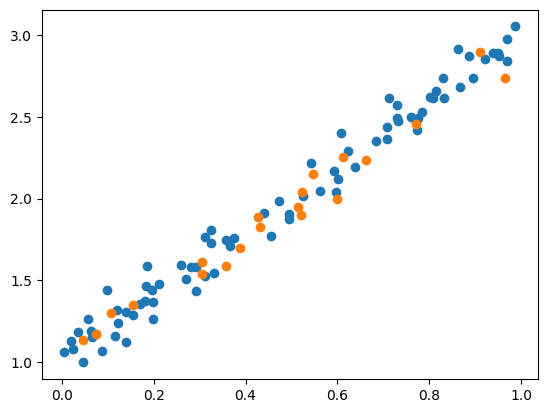

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

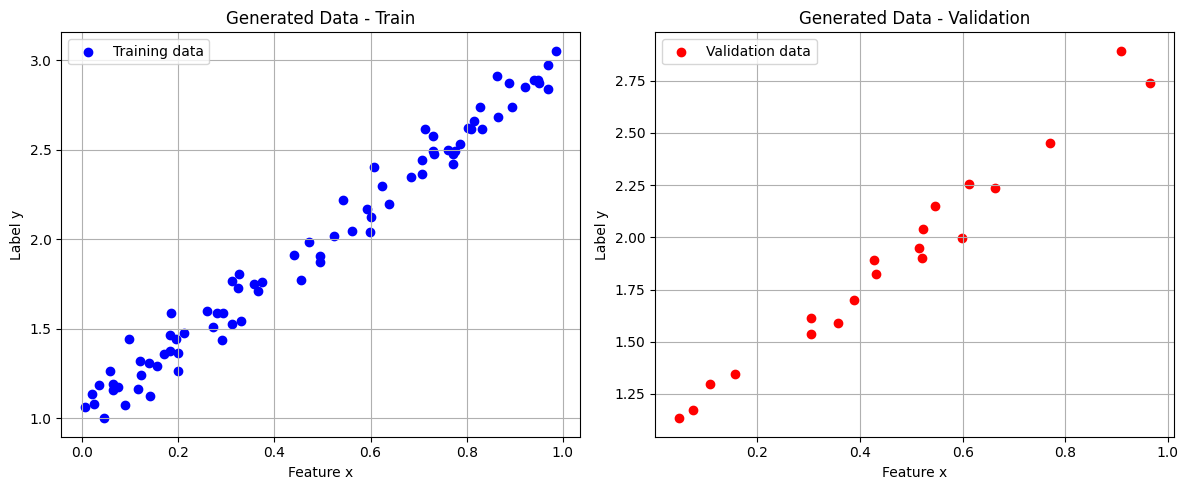

In [4]:
plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.title('Generated Data - Train')
plt.xlabel('Feature x')
plt.ylabel('Label y')
plt.legend()
plt.grid(True)

# Validation data plot
plt.subplot(1, 2, 2)
plt.scatter(x_val, y_val, color='red', label='Validation data')
plt.title('Generated Data - Validation')
plt.xlabel('Feature x')
plt.ylabel('Label y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

We know that a = 1 and b = 2, but now let’s see how close we can get to the true values by using gradient descent and the 80 points in the training set.

## 2. Gradient Descent

- ### Step 1: Compute the Loss:

  - For a regression problem, the loss is given by the Mean Square Error (MSE), that is, the average of all squared differences between labels (y) and predictions (a + bx).

- #### Mean Squared Error Equations

The Mean Squared Error (MSE) is calculated as follows:

**First Equation:**

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$


This equation calculates the MSE using the predicted values \(\hat{y}_i\). It represents the general form of MSE where \(\hat{y}_i\) are the predictions made by the model.

**Second Equation:**

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - a - bx_i)^2
$$


This equation specifies the predictions \(\hat{y}_i\) as \(a + bx_i\), where \(a\) and \(b\) are the parameters of the linear model. It shows how the predictions are calculated using the linear regression formula.

The author mentions these equations in the context of computing the loss for a regression problem using MSE. The difference highlights the transition from a general prediction \(\hat{y}_i\) to a specific linear model prediction \(a + bx_i\).

Additionally, the author discusses how the computation of MSE can vary based on the gradient descent approach:

  - **Batch Gradient Descent:** Uses all training points (\(N\)) to compute the loss.
  - **Stochastic Gradient Descent:** Uses a single point at a time.
  - **Mini-batch Gradient Descent:** Uses a subset of points (\(n\)) between 1 and \(N\).



- ### Step 2: Compute the Gradients


- For training a model, there are two initialization steps:
Random initialization of parameters/weights (we have only two, a and b);
- Initialization of hyper-parameters (in our case, only learning rate and number of epochs);


- For each epoch, there are four training steps:
    - Compute model’s predictions — this is the forward pass;
    - Compute the loss, using predictions and and labels and the appropriate loss function for the task at hand;
    - Compute the gradients for every parameter;
    - Update the parameters;

In [5]:
# Performing simple regression using NumPy and then only through Pytorch

np.random.seed(42)
a = np.random.rand(1)
b = np.random.rand(1)

print(a,b)

[0.37454012] [0.95071431]


In [6]:
lr = 1e-1 # learning rate
n_epochs = 1000 # number of epochs

for epoch in range(n_epochs):
  # Computes our model's predicted output
  y_hat = a + b * x_train  # y = a + bx
  error = (y_train - y_hat)

  # Since it's a regression problem, we compute MSE!
  loss = (error ** 2).mean()

  # Computing gradients for both a and b parameters
  a_grad = -2 * error.mean() # we derive that a' = -2 * (y - y_hat)
  b_grad = -2 * (x_train * error).mean()    # b' = -2 * (x * (y-y_hat))

  # Updates parameters using gradients and the learning rate
  a = a - lr * a_grad
  b = b - lr * b_grad

print('\n From gradients:')
print(a,b)

# Just to check - do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train, y_train)
print('\n From Scikit-learn:')
print(lnr.intercept_, lnr.coef_[0])


 From gradients:
[1.02354082] [1.96896434]

 From Scikit-learn:
[1.02354075] [1.96896447]


Time to TORCH it!

NOTES:
- An array having three dimensions is technically a tensor.
- A SCALAR (a single number) has zero dimensions, a VECTOR has one dimension, a MATRIX has two dimensions and a TENSOR has three or more dimensions. That’s it!
- But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, everything is either a scalar or a tensor.


In [7]:
pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=9c2f667debdd2a0c6aa35d4287413a0ffdda6a44c167859dd0a7bf05dc80e3f5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [8]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our dataset is in numpy, so we need to convert into pytorch tensor
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# Since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

# Numpy cannot handle gpu tensors, so before converting tensor to numpy, you need to make then CPU tensors

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [9]:
# FIRST
# If we need gradients of our parameters, we can just do requires_grad = True
a = torch.randn(1, requires_grad = True, dtype = torch.float)
b = torch.randn(1, requires_grad = True, dtype = torch.float)
print(a,b)

# To run in gpu
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a,b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# We can create regular tensors and send them to the device
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([-2.1528], requires_grad=True) tensor([-0.3292], requires_grad=True)
tensor([0.4545], requires_grad=True) tensor([1.6352], requires_grad=True)
tensor([0.1403], requires_grad=True) tensor([-0.6607], requires_grad=True)


In [10]:
# it is much better to assign tensors to a device at the moment of their creation
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [11]:
# Zeroing in the pytorch is done in order to zero out the previous gradient, such that the previous mini-batch gradient doesn't affect, in any way around, to the next gradient.
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)

a = torch.randn(1, requires_grad= True, dtype = torch.float, device = device)

b = torch.randn(1, requires_grad= True, dtype = torch.float, device = device)


for epoch in range(n_epochs):
  yhat = a + b * x_train_tensor
  error = y_train_tensor - yhat
  loss = (error ** 2).mean()

  # pytorch gradient
  loss.backward()

  #print('This is from previous calculations')
  #print(a.grad)
  #print(b.grad)

  # if we don't use torch.no_grad, it builds dynamic computation graph and doesn't necessary performs the normal python operations
  with torch.no_grad():
    a -= lr * a.grad
    b -= lr * b.grad


  # pytorch is clingy to its computed gradients, we need to tell it ti let it go
  a.grad.zero_()
  b.grad.zero_()


print(a,b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


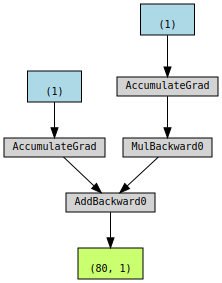

In [12]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()
make_dot(yhat)

In [13]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [14]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = device)
print('Before: a, b')
print(a,b)
lr = 1e-1
n_epochs = 1000

# pytorch makes actual loss function for us
loss_fn = nn.MSELoss(reduction='mean')

# define sgd optimizer
optimizer = optim.SGD([a,b], lr = lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward() # no more individua gradient calculation required

    optimizer.step() # no more manual update required
    optimizer.zero_grad() # don't have to make zeros

print(a, b)

Before: a, b
tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [15]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # to make 'a' and 'b' real parameters of the model, we need to wrap them with nn.Paramaters

    self.a = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  def forward(self, x):

    #computes output
    return self.a + self.b * x

In [16]:
torch.manual_seed(42)

model = ManualLinearRegression().to(device) # our model should be at same device as our data (GPU or CPU)
print(model.state_dict()) # it's parameters

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    model.train()  # setting the model into training mode. Some models may use mechanisms like Dropout, for instance, which have distinct behaviors in training and evaluation phase

    # no more manual prediction
    #yhat = a + b * x_train_tensor
    yhat = model(x_train_tensor)

    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print(a, b)

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [17]:
class LayerLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # we use a linear layer with single input and single output
    self.linear = nn.Linear(1,1) # here (1,1) represents the size(no of neurons) of previous layer , size in output layer

  def forward(self, x):
    # calling to the layer to make a prediction
    return self.linear(x)

In [18]:
[*LayerLinearRegression().parameters()]

[Parameter containing:
 tensor([[-0.2191]], requires_grad=True),
 Parameter containing:
 tensor([0.2018], requires_grad=True)]

In [19]:
# Alternately we can build a model with calling a class
model = nn.Sequential(nn.Linear(1,1)).to(device)

In [20]:
# generalizing things. if we make one function inside another, we can use this for any mode, lossfunction and optimizer
def make_train_step(model, loss_fn, optimizer):
  # function to perform a step in the train loop
  def train_step(x, y):
    model.train()

    #prediction
    yhat = model(x)

    #loss
    loss = loss_fn(y, yhat)

    # gradient
    loss.backward()

    #update
    optimizer.step()
    optimizer.zero_grad()

    #returns the loss
    return loss.item()

  return train_step # returns the function that will be called inside the train loop

train_step = make_train_step(model, loss_fn, optimizer)
losses = []

for epoch in range(n_epochs):
  loss = train_step(x_train_tensor, y_train_tensor)
  losses.append(loss)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]])), ('0.bias', tensor([0.5873]))])


In [21]:
from torch.utils.data import Dataset,TensorDataset

# loading as a tensor dataset by out custom function
class CustomDataset(Dataset):
  def __init__(self, x_tensor, y_tensor):
    self.x = x_tensor
    self.y = y_tensor

  # getitem function is used to load data on demand (whenever __getitem__ is called)
  def __getitem__(self, index):
    return (self.x[index], self.y[index])

  def __len__(self):
    return len(self.x)

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

# this is by pytorch inbuilt class
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


In [22]:
# Dataloader: this class use minibatches to load our dataset. We cannot use batch gradient if we have a very large dataset.
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_data, batch_size = 16, shuffle = True)

In [23]:
lossee = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
  # the dataset "lives" in the CPU, so do our mini-batches. Therefore, we need to send those mini-batches to the device where the model "lives"
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)

    loss = train_step(x_batch, y_batch)
    losses.append(loss)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]])), ('0.bias', tensor([0.5873]))])


In [24]:

from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)
train_dataset, val_dataset = random_split(dataset, [80,20])

train_loader = DataLoader(dataset=train_dataset, batch_size = 16)
val_loader = DataLoader(dataset = val_dataset, batch_size = 16)

In [25]:
losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    loss = train_step(x_batch, y_batch)
    losses.append(loss)

    with torch.no_grad():
       for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.4869]])), ('0.bias', tensor([0.5873]))])
